# Time-related feature engineering

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

## Data exploration on the Bike Sharing Demand dataset

In [2]:
from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame
df.head()
df.shape

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0,16.0
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0,40.0
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0,32.0
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0,13.0
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0,1.0


(17379, 13)

In [3]:
average_week_demand = df.groupby(["weekday", "hour"]).mean()["count"]
average_week_demand
average_week_demand.unstack()

weekday  hour
0.0      0.0      93.990385
         1.0      77.432692
         2.0      61.627451
         3.0      31.144231
         4.0       9.362745
                    ...    
6.0      19.0    239.932692
         20.0    180.865385
         21.0    156.000000
         22.0    139.663462
         23.0    115.855769
Name: count, Length: 168, dtype: float64

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
weekday,,,,,,,,,,,,,,,,,,,,,
0.0,93.990385,77.432692,61.627451,31.144231,9.362745,8.693878,14.495146,33.104762,83.857143,156.542857,...,363.628571,353.933333,355.400000,318.771429,272.628571,225.476190,168.028571,127.647619,94.123810,61.895238
1.0,34.009524,17.307692,10.313131,5.113402,5.785714,21.653846,85.865385,248.538462,412.192308,218.442308,...,192.701923,202.365385,284.451923,502.394231,481.346154,344.576923,242.076923,174.538462,115.759615,65.403846
2.0,27.623762,12.540000,6.801980,4.152174,5.131313,24.455446,106.500000,299.696078,471.784314,236.450980,...,168.365385,186.903846,286.701923,544.278846,517.567308,353.923077,253.192308,186.230769,132.278846,76.173077
3.0,34.557692,15.336538,7.813725,4.888889,4.968750,25.750000,107.807692,303.980769,488.326923,238.528846,...,170.548077,181.288462,272.961538,513.144231,494.029126,357.504854,256.660194,194.669903,143.689320,83.737864
4.0,39.271845,17.223301,9.156863,5.071429,5.280000,25.912621,107.436893,304.737864,488.572816,240.873786,...,177.563107,196.475728,286.298077,527.346154,502.096154,358.451923,268.913462,197.884615,147.240385,96.750000
5.0,52.432692,24.721154,12.740385,6.598039,6.072165,23.903846,90.028846,254.326923,462.278846,258.990385,...,229.365385,252.461538,330.990385,492.413462,420.990385,302.067308,213.326923,169.875000,147.067308,115.211538
6.0,94.304762,67.780952,50.495238,22.885714,7.657143,8.291262,21.000000,45.961905,114.476190,186.790476,...,381.333333,382.428571,366.142857,334.409524,292.048077,239.932692,180.865385,156.000000,139.663462,115.855769


<AxesSubplot:xlabel='weekday,hour'>

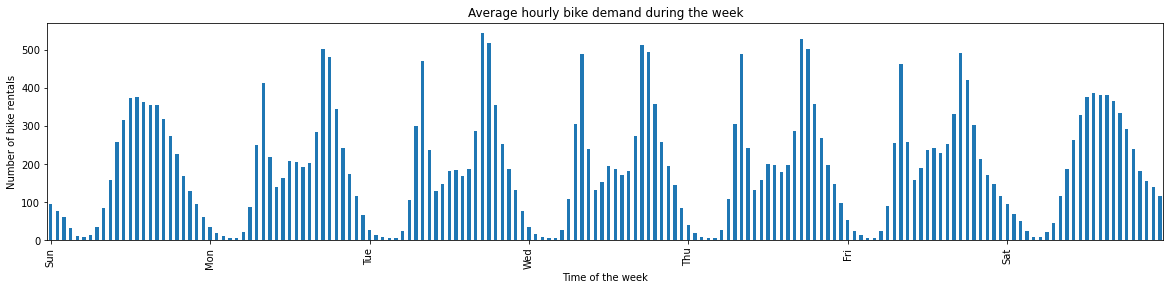

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 4))
average_week_demand.plot(kind='bar', ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

In [5]:
df["count"].max()

977.0

In [6]:
y = df["count"] / df["count"].max()

<AxesSubplot:>

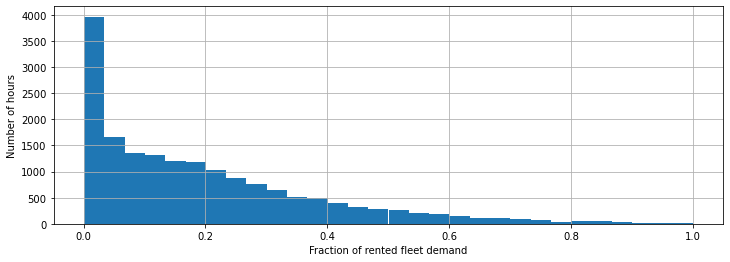

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="Fraction of rented fleet demand",
    ylabel="Number of hours",
)

<AxesSubplot:>

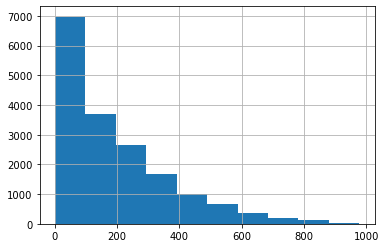

In [8]:
df["count"].hist()

In [9]:
X = df.drop("count", axis="columns")
X.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0


In [10]:
X["weather"].value_counts()

clear         11413
misty          4544
rain           1419
heavy_rain        3
Name: weather, dtype: int64

In [11]:
X["weather"].replace('heavy_rain', 'rain', inplace=True)

In [12]:
X["season"].value_counts()

fall      4496
summer    4409
spring    4242
winter    4232
Name: season, dtype: int64

## Time-based cross-validation

In [14]:
import numpy as np
input = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
answer = np.array([1, 2, 3, 4, 5, 6])
input

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
print(tscv)

for train_index, test_index in tscv.split(input):
    print("TRAIN:", train_index, "TEST:", test_index)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [20]:
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000,
)

In [21]:
for train_index, test_index in ts_cv.split(X):
    train_index, test_index[0:10]
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)

(array([ 2331,  2332,  2333, ..., 12328, 12329, 12330]),
 array([12379, 12380, 12381, 12382, 12383, 12384, 12385, 12386, 12387,
        12388]))

TRAIN: (10000,) TEST: (1000,)


(array([ 3331,  3332,  3333, ..., 13328, 13329, 13330]),
 array([13379, 13380, 13381, 13382, 13383, 13384, 13385, 13386, 13387,
        13388]))

TRAIN: (10000,) TEST: (1000,)


(array([ 4331,  4332,  4333, ..., 14328, 14329, 14330]),
 array([14379, 14380, 14381, 14382, 14383, 14384, 14385, 14386, 14387,
        14388]))

TRAIN: (10000,) TEST: (1000,)


(array([ 5331,  5332,  5333, ..., 15328, 15329, 15330]),
 array([15379, 15380, 15381, 15382, 15383, 15384, 15385, 15386, 15387,
        15388]))

TRAIN: (10000,) TEST: (1000,)


(array([ 6331,  6332,  6333, ..., 16328, 16329, 16330]),
 array([16379, 16380, 16381, 16382, 16383, 16384, 16385, 16386, 16387,
        16388]))

TRAIN: (10000,) TEST: (1000,)


Let us manually inspect the various splits to check that the TimeSeriesSplit works as we expect, starting with the first split:

In [22]:
list(ts_cv.split(X, y))

[(array([ 2331,  2332,  2333, ..., 12328, 12329, 12330]),
  array([12379, 12380, 12381, 12382, 12383, 12384, 12385, 12386, 12387,
         12388, 12389, 12390, 12391, 12392, 12393, 12394, 12395, 12396,
         12397, 12398, 12399, 12400, 12401, 12402, 12403, 12404, 12405,
         12406, 12407, 12408, 12409, 12410, 12411, 12412, 12413, 12414,
         12415, 12416, 12417, 12418, 12419, 12420, 12421, 12422, 12423,
         12424, 12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432,
         12433, 12434, 12435, 12436, 12437, 12438, 12439, 12440, 12441,
         12442, 12443, 12444, 12445, 12446, 12447, 12448, 12449, 12450,
         12451, 12452, 12453, 12454, 12455, 12456, 12457, 12458, 12459,
         12460, 12461, 12462, 12463, 12464, 12465, 12466, 12467, 12468,
         12469, 12470, 12471, 12472, 12473, 12474, 12475, 12476, 12477,
         12478, 12479, 12480, 12481, 12482, 12483, 12484, 12485, 12486,
         12487, 12488, 12489, 12490, 12491, 12492, 12493, 12494, 12495,
      

In [23]:
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
train_0
test_0[0:100]

array([ 2331,  2332,  2333, ..., 12328, 12329, 12330])

array([12379, 12380, 12381, 12382, 12383, 12384, 12385, 12386, 12387,
       12388, 12389, 12390, 12391, 12392, 12393, 12394, 12395, 12396,
       12397, 12398, 12399, 12400, 12401, 12402, 12403, 12404, 12405,
       12406, 12407, 12408, 12409, 12410, 12411, 12412, 12413, 12414,
       12415, 12416, 12417, 12418, 12419, 12420, 12421, 12422, 12423,
       12424, 12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432,
       12433, 12434, 12435, 12436, 12437, 12438, 12439, 12440, 12441,
       12442, 12443, 12444, 12445, 12446, 12447, 12448, 12449, 12450,
       12451, 12452, 12453, 12454, 12455, 12456, 12457, 12458, 12459,
       12460, 12461, 12462, 12463, 12464, 12465, 12466, 12467, 12468,
       12469, 12470, 12471, 12472, 12473, 12474, 12475, 12476, 12477,
       12478])

In [24]:
X.iloc[train_0].head()
X.iloc[train_0].shape

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
2331,summer,0.0,4.0,1.0,False,2.0,True,misty,25.42,31.060,0.50,6.0032
2332,summer,0.0,4.0,2.0,False,2.0,True,misty,24.60,31.060,0.53,8.9981
2333,summer,0.0,4.0,3.0,False,2.0,True,misty,23.78,27.275,0.56,8.9981
2334,summer,0.0,4.0,4.0,False,2.0,True,misty,22.96,26.515,0.64,8.9981
2335,summer,0.0,4.0,5.0,False,2.0,True,misty,22.14,25.760,0.68,8.9981


(10000, 12)

In [25]:
X.iloc[test_0].head()
X.iloc[test_0].shape

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
12379,summer,1.0,6.0,0.0,False,2.0,True,clear,22.14,25.76,0.68,27.9993
12380,summer,1.0,6.0,1.0,False,2.0,True,misty,21.32,25.00,0.77,22.0028
12381,summer,1.0,6.0,2.0,False,2.0,True,rain,21.32,25.00,0.72,19.9995
12382,summer,1.0,6.0,3.0,False,2.0,True,rain,20.50,24.24,0.82,12.9980
12383,summer,1.0,6.0,4.0,False,2.0,True,rain,20.50,24.24,0.82,12.9980


(1000, 12)

We now inspect the last split:

In [26]:
train_4, test_4 = all_splits[4]
X.iloc[train_4].head()
X.iloc[train_4].shape
X.iloc[test_4].head()
X.iloc[test_4].shape

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
6331,winter,0.0,9.0,9.0,False,1.0,True,misty,26.24,28.790,0.89,12.9980
6332,winter,0.0,9.0,10.0,False,1.0,True,misty,26.24,28.790,0.89,12.9980
6333,winter,0.0,9.0,11.0,False,1.0,True,clear,27.88,31.820,0.79,15.0013
6334,winter,0.0,9.0,12.0,False,1.0,True,misty,27.88,31.820,0.79,11.0014
6335,winter,0.0,9.0,13.0,False,1.0,True,misty,28.70,33.335,0.74,11.0014


(10000, 12)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
16379,winter,1.0,11.0,5.0,False,2.0,True,misty,13.94,16.665,0.66,8.9981
16380,winter,1.0,11.0,6.0,False,2.0,True,misty,13.94,16.665,0.71,11.0014
16381,winter,1.0,11.0,7.0,False,2.0,True,clear,13.12,16.665,0.76,6.0032
16382,winter,1.0,11.0,8.0,False,2.0,True,clear,13.94,16.665,0.71,8.9981
16383,winter,1.0,11.0,9.0,False,2.0,True,misty,14.76,18.940,0.71,0.0000


(1000, 12)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate

categorical_columns = [
    "weather",
    "season",
    "holiday",
    "workingday",
]

In [34]:
for col in categorical_columns:
    X[col].unique()

['clear', 'misty', 'rain']
Categories (3, object): ['clear', 'misty', 'rain']

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

['False', 'True']
Categories (2, object): ['True', 'False']

['False', 'True']
Categories (2, object): ['True', 'False']

In [35]:
# 다른 명칭으로 변경하고 싶을 떄
categories_type = [
    ["clear", "misty", "rain"],
    ["spring", "summer", "fall", "winter"],
    ["False", "True"],
    ["False", "True"],
]

ordinal_encoder = OrdinalEncoder(categories=categories_type)

gbrt_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
    ),
    
    HistGradientBoostingRegressor(
        categorical_features=range(4),
    ),
)

In [31]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [32]:
evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.044 +/- 0.003
Root Mean Squared Error: 0.068 +/- 0.005


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
import numpy as np


one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
alphas = np.logspace(-6, 6, 25)
naive_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)

evaluate(naive_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.142 +/- 0.014
Root Mean Squared Error: 0.184 +/- 0.020


In [37]:
one_hot_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["hour", "weekday", "month"]),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)

evaluate(one_hot_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.099 +/- 0.011
Root Mean Squared Error: 0.131 +/- 0.011


# End